## Naive Bayes

<br><br>
<img src="n1.png" style="width:400px;height:300px"/>

Siyah nokta matematik öğretmeni midir, fizik öğretmeni midir? Bu soruyu Naive Bayes algoritması ile cevaplayalım. Siyah noktaya X diyelim.

P(Math|X) : Bu ifade X noktasının Matematik öğretmeni olması olasılığı dmeektir.

<br><br>
<img src="n2.png" style="width:600px;height:300px"/>

P(Math) ifadesi siyah nokta hariç geri kalan noktalar içerisinde matematik öğretmenlerin olasılığıdır.

1)Prior probability = Tüm noktalar içerisinde matematik öğretmenlerinin olasılığıdır:

    P(Math) = 6/11   (Toplam 11 nokta var ve 6 tanesi matematik öğretmeni sınıfına ait)
    
2)Marginal likelihood = Similarity range belirlenmelidir. Similarity range aşağıda gördüğünüz mor alandır: 
<br><br>
<img src="n3.png" style="width:300px;height:300px"/>

P(X) = 4/11   (Toplam 11 nokta var ve belirlediğimiz range'in içerisinde toplam 4 nokta var)

3) likelihood = Matematik öğretmenine göre X değerinin olasılığıdır.

    P(X|Math) = 3/6 (Toplam 6 tane matematik öğretmeni sınıfına ait nokta var ve range alanı içerisinde 3 tane matematik                            sınıfına ait nokta var)
    
Sonuç olarak:
    
    P(Math|X) = (3/6 * 6/11) / (4/11)  =  3/4  =  %75
    
X noktası belirlediğimiz similarity range'e göre %75 oranında matematik öğretmeni sınıfına aittir.

Birde fizik öğretmeni sınıfına ait olma olasılığına bakalım:

P(fizik|X) = ( P(X|fizik) * P(fizik) ) / P(X)

P(fizik) = 5/11

P(X) = 4/11

P(X|fizik) = 1/5

P(fizik|X) = ( P(X|fizik) * P(fizik) ) / P(X) ifadesinde bulduğumuz değerleri yerine koyalım:

( 1/5 * 5/11 ) / (4/11)  =  1/4  =  %25

%25 olması gerekiyordu çünkü matematik sınıfına ait olma olasılığını %75 bulmuştuk bu durumda fizik sınıfına ait olma olasılığı %25 olur.

Şimdi Naive Bayes algoritmasının kodunu yazalım.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

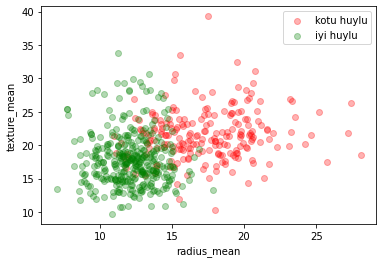

In [5]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu huylu",alpha=0.3) #alpha parametresi ile saydamlık sağlanır.
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi huylu",alpha=0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [6]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]

In [7]:
y = data.diagnosis.values

x_data = data.drop(["diagnosis"],axis=1)

In [8]:
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [9]:
#train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [10]:
#SVM

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [11]:
nb.score(x_test,y_test)

0.935672514619883

%93 oranında doğruluk değeri elde ettik.